In [1]:
import pandas as pd
import numpy as np
import html5lib
import sys
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pylab import *
import pickle

# Analyzing the course scrape

In [2]:
# We load the course scrape URL.
dict_load = np.load('kurser_scrabe_ALL.npy', allow_pickle=True).item()
dict_load;
df = pd.DataFrame.from_dict(dict_load, orient='index')

In [4]:
# Variables we will use for our project:
# We split the variables to the figures don´t get too big.
chosen_ones_v1 = ['Course Name', 'Credit', 'Type of assessment', 'Aid', \
        'Censorship form', 'Re-exam','Year', 'Course id','Lectures', \
       'Preparation', 'Exam']#, \
chosen_ones_v2 = [    'Total',     'Field Work', \
       'Class Instruction', 'Practical exercises', \
       'Seminar', 'Guidance',#, \
'Class Seminar','Class Exercises', 'Study Groups', 'Exercises', \
       'Exam Preparation', 'Excursions']#, \
chosen_ones_v3 = [       'Course Preparation', 'Theory exercises', 'Project work',\
       'Clinical practice', 'Colloquia', 'Laboratory', \
       'E-Learning', 'Practical Training',  'Tutoring',\
       'Manuduktion']

name_list =[chosen_ones_v1,chosen_ones_v2,chosen_ones_v3]

11
12
10


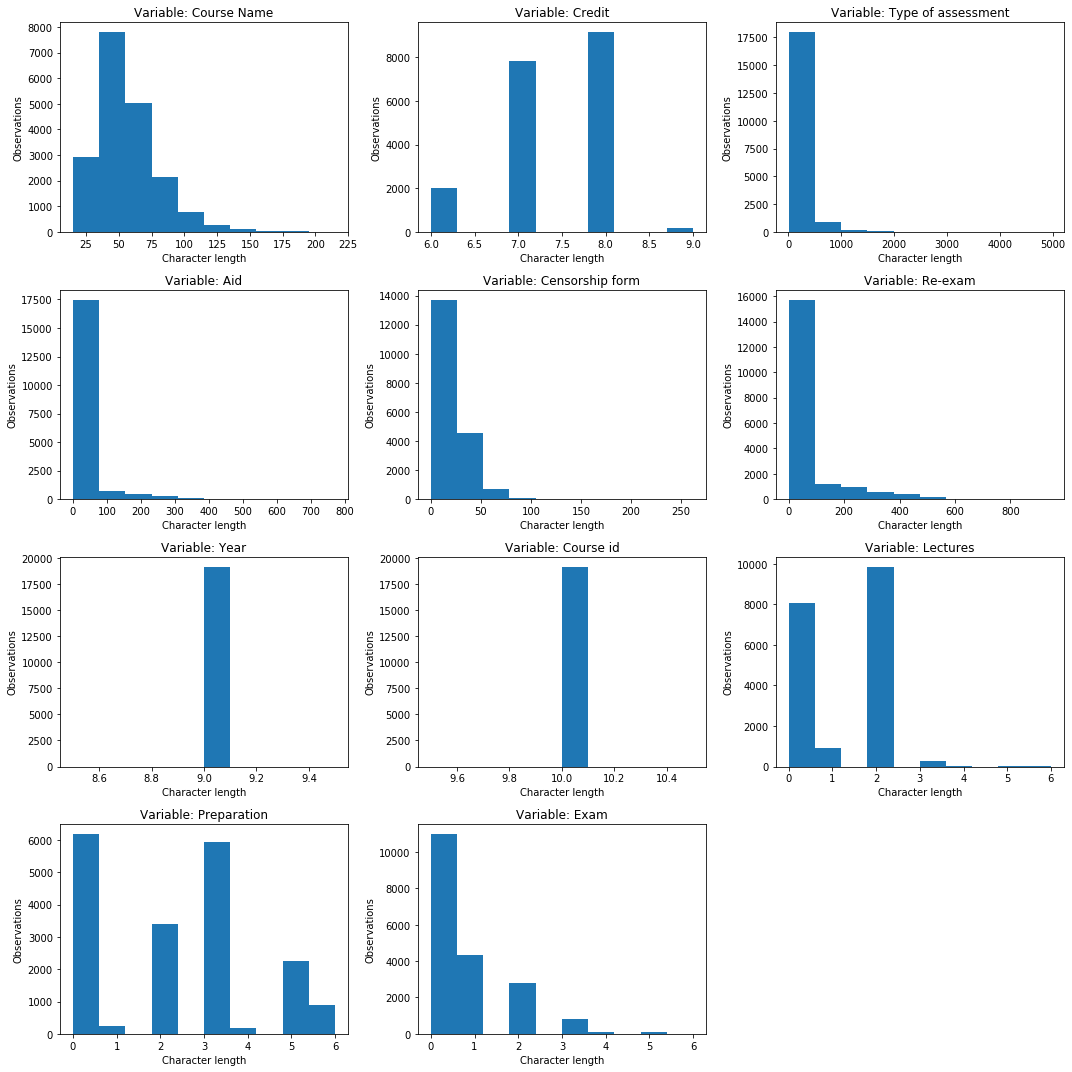

In [23]:
# Plotting the first set of variable in a for in loop. The figure will get too big if we dont split it up. 
f, ax = plt.subplots(figsize=(15,15))

i=1

# Running through each column, ie. scrapped variable.
for col in name_list[0]:
        
        plt.subplot(4, 3, i)
        plt.hist(df[col].fillna('').apply(len))
        plt.ylabel('Observations')
        plt.xlabel('Character length')
        plt.title('Variable: '+ str(col))
        plt.tight_layout()
        i=i+1

f.savefig('histogram_of_course_scrape_FIRST.png')       

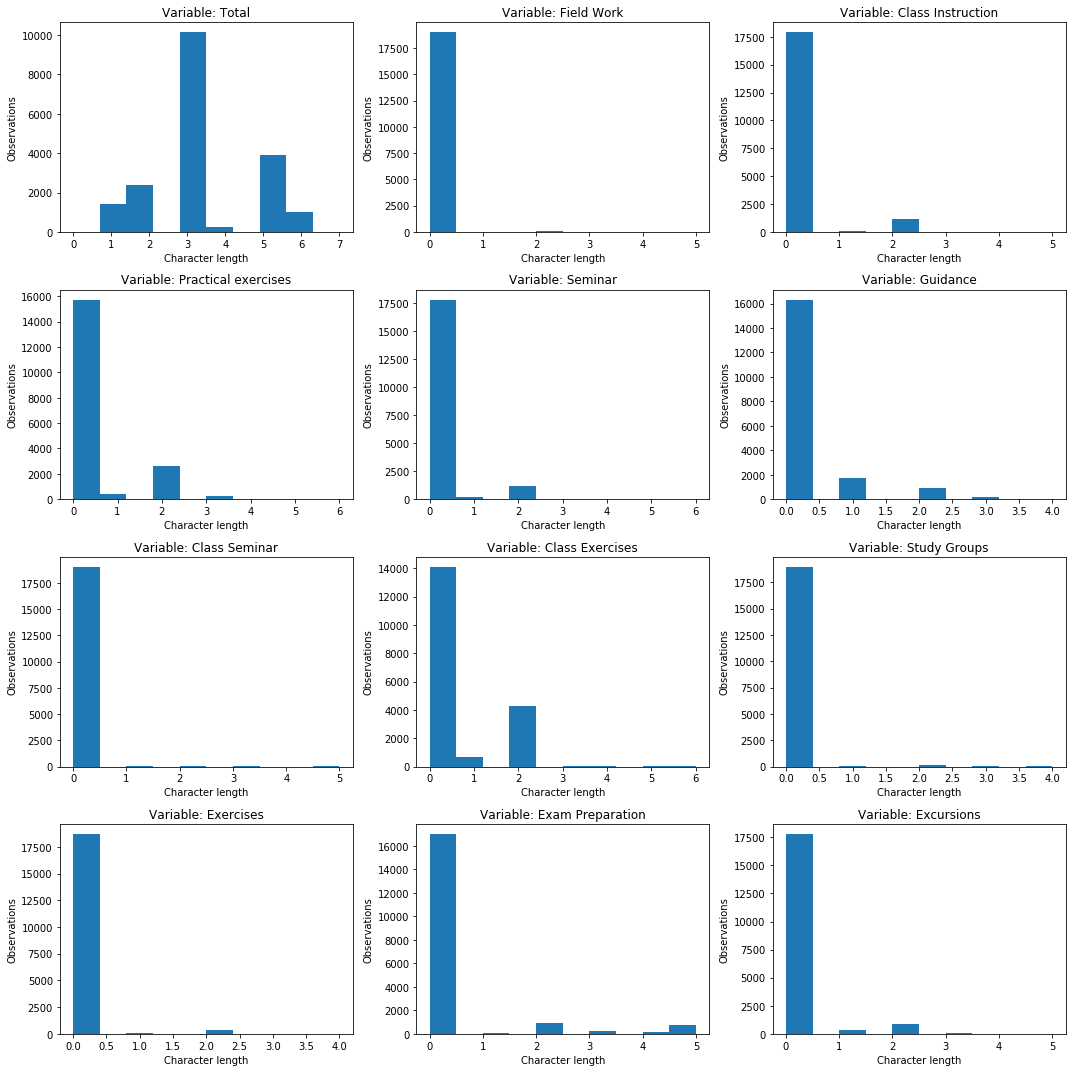

In [24]:
# Second set
f, ax = plt.subplots(figsize=(15,15))

i=1

# Running through each column, ie. scrapped variable.
for col in name_list[1]:
        
        plt.subplot(4, 3, i)
        plt.hist(df[col].fillna('').apply(len))
        plt.ylabel('Observations')
        plt.xlabel('Character length')
        plt.title('Variable: '+ str(col))
        plt.tight_layout()
        i=i+1
        
f.savefig('histogram_of_course_scrape_SECOND.png')  

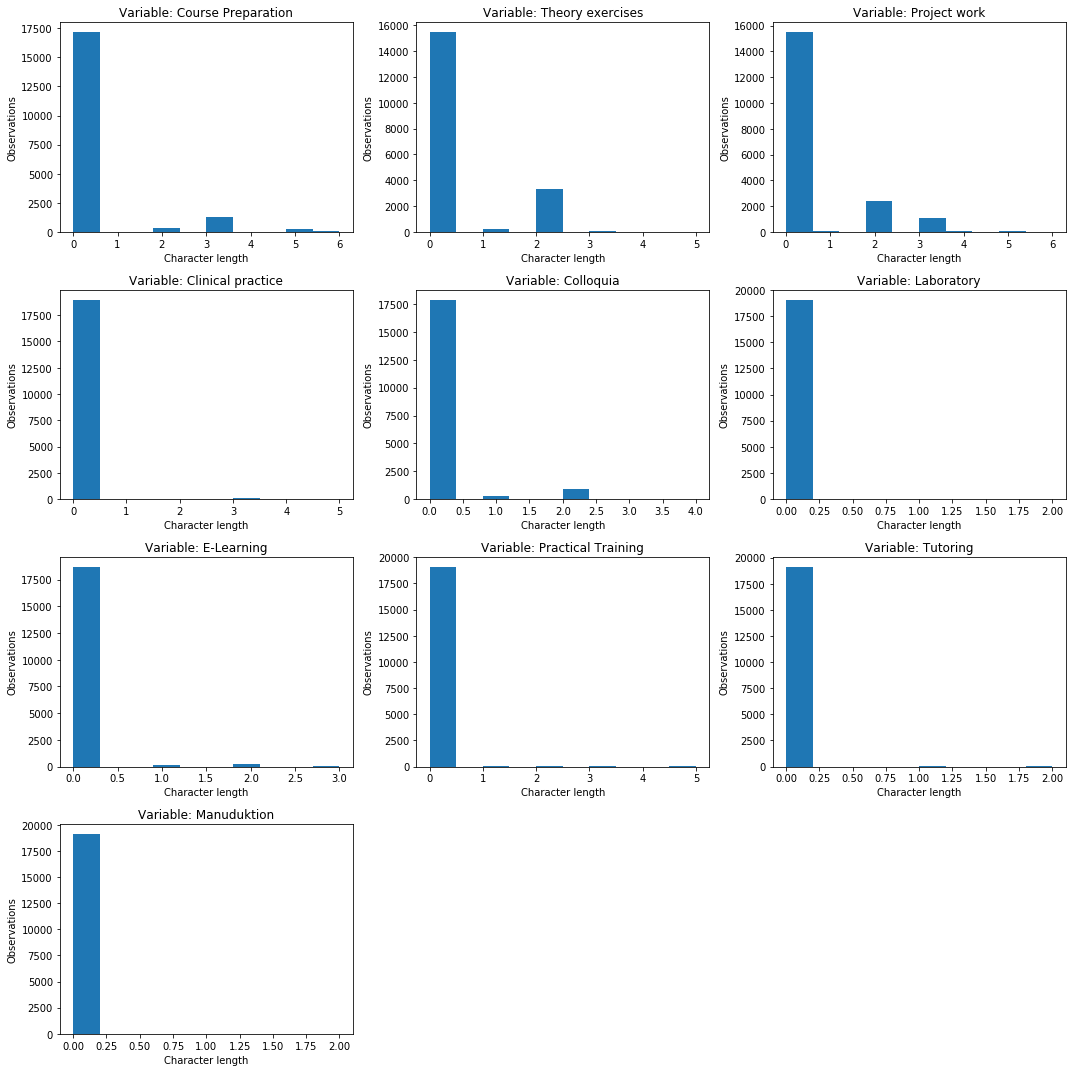

In [25]:
# Third set
f, ax = plt.subplots(figsize=(15,15))
i=1
# Running through each column, ie. scrapped variable.
for col in name_list[2]:
        
        plt.subplot(4, 3, i)
        plt.hist(df[col].fillna('').apply(len))
        plt.ylabel('Observations')
        plt.xlabel('Character length')
        plt.title('Variable: '+ str(col))
        plt.tight_layout()
        i=i+1

f.savefig('histogram_of_course_scrape_THIRD.png')

In [44]:
# Creating new data set, to make on big figre.
chosen_ones = df[['Course Name', 'Credit', 'Type of assessment', 'Aid', \
        'Censorship form', 'Re-exam','Year', 'Course id','Lectures', \
       'Preparation', 'Exam','Total',     'Field Work', \
       'Class Instruction', 'Practical exercises', \
       'Seminar', 'Guidance','Class Seminar','Class Exercises', 'Study Groups', 'Exercises', \
       'Exam Preparation', 'Excursions', 'Course Preparation', 'Theory exercises', 'Project work',\
       'Clinical practice', 'Colloquia', 'Laboratory', \
       'E-Learning', 'Practical Training',  'Tutoring',\
       'Manuduktion']]

In [45]:
#Number of NaN's
df_nans = chosen_ones.apply(lambda x: x.isna().sum())
list_nans=df_nans.tolist() 
list_names=df_nans.index.values.tolist() 

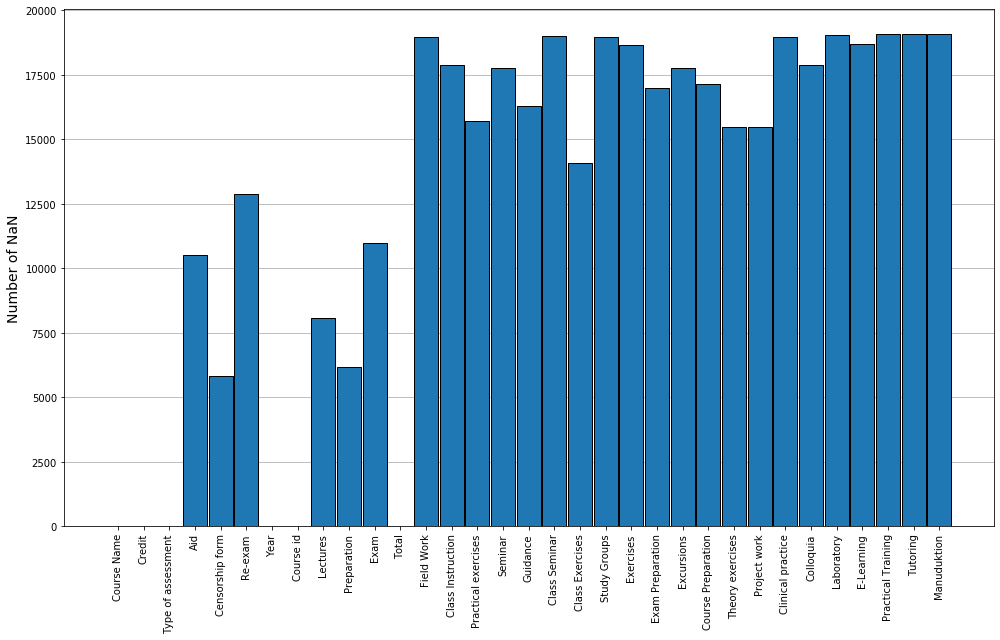

In [48]:
# Creating figure to show number of NaNs for each scrapped variable. 
f, ax = plt.subplots(figsize=(14,9))

plt.subplot(1, 1, 1)
plt.grid(axis ='y',zorder=0)
plt.ylabel('Number of NaN',fontsize=14)
plt.xticks(rotation=90)
plt.bar(list_names, list_nans, width=0.93, edgecolor='black',zorder=3)
plt.tight_layout()

f.savefig('course_number_of_nans.png')

# Analyzing the grade scrape

In [185]:
# Loading grade scrape data. 
with open('SCRAPE_GRADE_RESULTS.pkl', 'rb') as f:
    grades = pickle.load(f)
    grades = grades.set_index([0])
    grades_trans = grades.Tgrades_trans = grades.T

# Dropping rows which do not contain an URL ie. no exam data exits. 
grades_trans = grades_trans.dropna(subset = ['URL'])

C:\Users\jens_\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [172]:
# Replacing with true NaN
grades_trans = grades_trans.replace(to_replace ="nan", value = np.nan) 

In [186]:
# Converting to string inorder to count strings.

for i in grades_trans.columns.values:
    grades_trans[i] = grades_trans[i].apply(str)

C:\Users\jens_\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [187]:
# Replacing with true NaN
grades_trans = grades_trans.replace(to_replace ="nan", value = np.nan) 

In [216]:
#  We split the data in two, since one big figure will be too big.
v1 = ['Kursus', 'Fakultet', 'Institut', 'Termin', 'ECTS','Eksamenstype', 'Antal tilmeldte', 'Fremmødte', 'Antal bestået']
v2 = [ 'Eksamensgennemsnit', 12, 10, 7, 4, 2, 0, -3, 'Ej mødt']

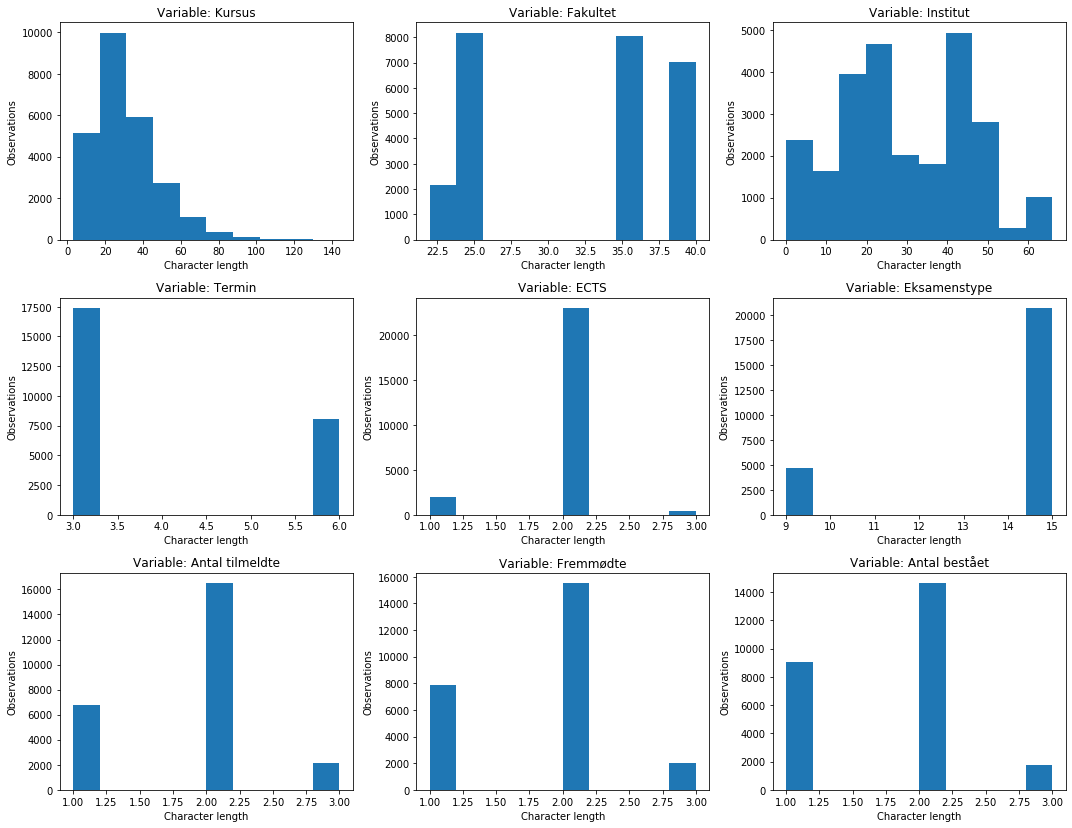

In [217]:
# Plotting the first set of variable in a for in loop.
f, ax = plt.subplots(figsize=(15,15))

# Running through each column, ie. scrapped variable.
for col in v1:
        
        plt.subplot(4, 3, i)
        plt.hist(grades_trans[col].fillna('').apply(len))
        plt.ylabel('Observations')
        plt.xlabel('Character length')
        plt.title('Variable: '+ str(col))
        plt.tight_layout()
        i=i+1

f.savefig('histogram_of_grades_scrape_FIRST.png')     

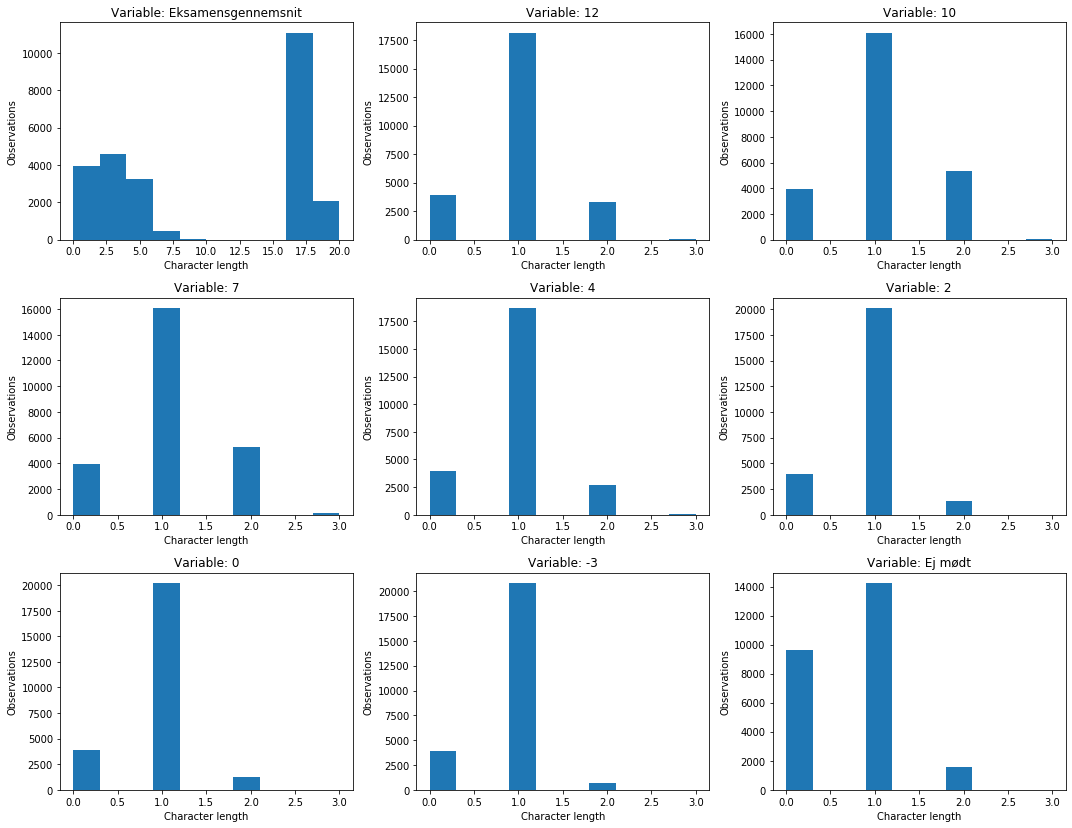

In [218]:
# Plotting the first set of variable in a for in loop.
f, ax = plt.subplots(figsize=(15,15))

i=1
# Running through each column, ie. scrapped variable.
for col in v2:
        
        plt.subplot(4, 3, i)
        plt.hist(grades_trans[col].fillna('').apply(len))
        plt.ylabel('Observations')
        plt.xlabel('Character length')
        plt.title('Variable: '+ str(col))
        plt.tight_layout()
        i=i+1

f.savefig('histogram_of_grades_scrape_SECOND.png')     

In [93]:
high_grades = grades_trans[grades_trans[12]>'100']
high_grades

,URL,Kursus,Fakultet,Institut,Termin,ECTS,Eksamenstype,Antal tilmeldte,Fremmødte,Antal bestået,Eksamensgennemsnit,12,10,7,4,2,0,-3,Ej mødt,Ikke bestået
1,http://karakterstatistik.stads.ku.dk/Histogram...,Numerical methods in atmospheric and oceanic ...,Det Natur- og Biovidenskabelige Fakultet,Niels Bohr Institutet,s15/B3,75,Ordinær eksamen,16,14,14,7.857142857142857,3,2,6,3,0,0,0,2,nan
2,http://karakterstatistik.stads.ku.dk/Histogram...,Toxicology and Drug Safety,Det Sundhedsvidenskabelige Fakultet,Farmaci,v18/B1,5,Ordinær eksamen,163,160,144,5.53125,3,35,44,38,24,13,3,3,nan
9,http://karakterstatistik.stads.ku.dk/Histogram...,\tFeltstudium og projektorienteret forløb,Det Teologiske Fakultet,nan,s15,30,Ordinær eksamen,5,4,4,nan,nan,nan,nan,nan,nan,nan,nan,1,0
14,http://karakterstatistik.stads.ku.dk/Histogram...,"""Os og Dem""- Indvandrings- og integrationspoli...",Det Samfundsvidenskabelige Fakultet,Institut for Statskundskab,s18,75,Ordinær eksamen,17,16,15,8.1875,5,4,4,1,1,0,1,1,nan
15,http://karakterstatistik.stads.ku.dk/Histogram...,"""Os og Dem""- Indvandrings- og integrationspoli...",Det Samfundsvidenskabelige Fakultet,Institut for Statskundskab,v16,75,Ordinær eksamen,29,27,26,8.25925925925926,9,7,4,4,2,0,1,2,nan
16,http://karakterstatistik.stads.ku.dk/Histogram...,"""Os og dem?"" - Indvandrings- og integrationspo...",Det Samfundsvidenskabelige Fakultet,Institut for Statskundskab,v15,75,Ordinær eksamen,23,19,18,7.421052631578948,5,4,3,4,2,1,0,4,nan
17,http://karakterstatistik.stads.ku.dk/Histogram...,"""Os og dem?"" - Indvandrings- og integrationspo...",Det Samfundsvidenskabelige Fakultet,Institut for Statskundskab,v15,10,Ordinær eksamen,7,7,7,6.857142857142857,2,1,0,3,1,0,0,nan,nan
18,http://karakterstatistik.stads.ku.dk/Histogram...,"""Os og dem?"" - Indvandrings- og integrationspo...",Det Samfundsvidenskabelige Fakultet,Institut for Statskundskab,v15,10,Ordinær eksamen,15,15,15,8.533333333333333,4,4,4,3,0,0,0,nan,nan
19,http://karakterstatistik.stads.ku.dk/Histogram...,"""Os og dem?"" - Indvandrings- og integrationspo...",Det Samfundsvidenskabelige Fakultet,Institut for Statskundskab,v14,10,Ordinær eksamen,6,6,6,11.333333333333334,4,2,0,0,0,0,0,nan,nan
20,http://karakterstatistik.stads.ku.dk/Histogram...,"""Os og dem?"" - Indvandrings- og integrationspo...",Det Samfundsvidenskabelige Fakultet,Institut for Statskundskab,v14,10,Ordinær eksamen,23,22,22,10.227272727272727,13,3,5,1,0,0,0,1,nan


In [219]:
# Converting to string first
grades_trans['12']=grades_trans[12]
grades_trans['10']=grades_trans[10]
grades_trans['7']=grades_trans[7]
grades_trans['4']=grades_trans[4]
grades_trans['2']=grades_trans[2]
grades_trans['0']=grades_trans[0]
grades_trans['-3']=grades_trans[-3]

# Then ready
chosen_ones_v2=grades_trans[['Kursus', 'Fakultet', 'Institut', 'Termin', 'ECTS','Eksamenstype', 'Antal tilmeldte', 'Fremmødte', 'Antal bestået',\
                             'Eksamensgennemsnit', '12', '10', '7', '4', '2', '0', '-3', 'Ej mødt']]

In [220]:
#Number of NaN's
df_grades_nans = chosen_ones_v2.apply(lambda x: x.isna().sum())
list_grades_nans=df_grades_nans.tolist() 
list_grades_names=df_grades_nans.index.values.tolist() 

In [221]:
df_grades_nans = str(df_grades_nans)

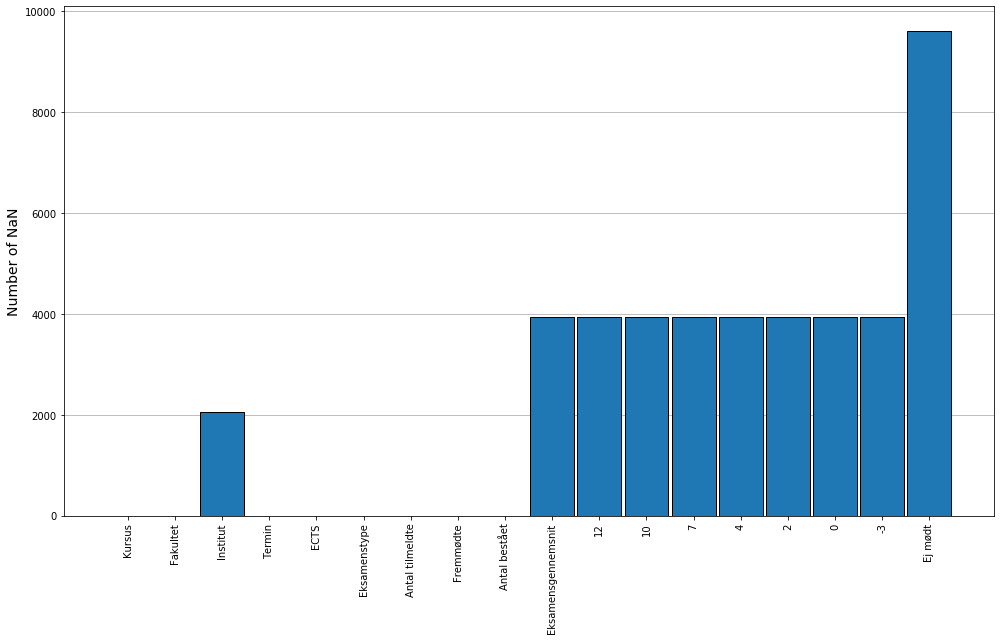

In [222]:
# Creating figure to show number of NaNs for each scrapped variable. 
f, ax = plt.subplots(figsize=(14,9))

plt.subplot(1, 1, 1)
plt.grid(axis ='y',zorder=0)
plt.ylabel('Number of NaN',fontsize=14)
plt.xticks(rotation=90)
plt.bar(list_grades_names, list_grades_nans, width=0.93, edgecolor='black',zorder=3)
plt.tight_layout()

f.savefig('grades_number_of_nans.png')